**Convolutional Neural Networks (CNN)**

Чаще всего используется при работе с графическими данными

Входной сигнал подается частично (не все изображение, а его часть). Например квадрат 3 * 3. Потом квадрат перемешается в сторону на опредленный шаг. Область сканирования шагает по изображению и каждый шаг подается на отдельный нейрон.При это весовые коэффициенты одинаковые и все сканирование производится на группе нейронов. Далее повторное сканирование только на другую группу нейронов с другими весовыми коэффициентами. И так далее n-групп нейронов.

Весовые коэфф не меняются внутри группы. Мы имеем окно (3 * 3 пикселя). Мы имеем набор числа умножаемые на весовые коэфф + биас. И получаем выходной сигнал. И тд для каждого смещения (шага) и каждого нейрона. Получаем 3 * 3 пискелей (для каждого отдельный весовой коэфф и + биас) = 10 параметров.

n групп * 10 параметров = 10n - это свертка 

окно сканирования - импульсный отклик фильтра (ядро фильтра)

Удобно то, что каждая группа нейронов выделяет отдельные элементы изображения (одна выделяет прямые линни, другая косые, третья вертикальные и тд)

На выходи получаем набор карт признаков (каналы)

Получая карты признаков, следущая группа нейронов (слой) может уже отпределять более сложные признаки (элипсы, кривые и тд)

Если мы рассматриваем цветное изображение. То у нас отдельный фильтр для красного, сигнего и зеленого. Получаем карты признаков по цветам Они складываются и прибаляется биас к общей сумме цветов. Общую сумму мы пропускаем через функцию активации и получаем итоговый цвет.

Так же по периметру изображеия добавляются по 1 пискелю. Для нормального перемещения по изображению. 

**Pooling**

Изменение масштаба

MaxPooling - отбор наибольших значений (всю карту признаков прогоняем маленьким окном) и выбираем иаксимальное знаечние. И составлем другую картц по меньше состоящей только из максимальных значений в квадратах. 

MinPooling и AveragePooling работают аналогично

Анализ на более крупном масштабе (нейроном проще выбрать более общие признаки)

**Общая архитектура сверточной НС:**

1. Подаем изображение 32 * 32 пикселя

2. Проходит через 10 каналов 1-го скрытого слоя (получаем карту признаков 32 * 32 и 10 каналов)

3. MaxPooling (увеличиваем масштаб, получаем 16 * 16 и 10 каналов) - теперь берем этот тензор и воспринимаем его как многоканальное изображение

4. Анализируем новый тензор через 30 групп нейронов (получаем 16 * 16 с 30 каналами)

5. MaxPooling (увеличиваем масштаб, получаем 8 * 8 и 30 каналов) - теперь берем этот тензор и воспринимаем его как многоканальное изображение

И можем так продолжать пока не будет размер изображения 1 * 1 пискель

Или прекратить и подать вычесленные карты признаков в обычную полносвязную НС.

Реализация:

Описание согласно концепции CNN

In [ ]:
keras.layers.Conv2D(filters, kernel_size, strides=(1, 1), ....)
#filters - число ядер (каналов)
#kernel_size - размер ядер (в виде кортежей вдух чисел)
#strides - шаг сканирования фильтров по осям плоскости (по умолчанию один пиксел)
#подробнее в документации

Пример на основе проекта распознования рукописных цифр создаем первый сверточный слой

In [ ]:
model = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='rule', input_shape=(28, 28, 1)),
])
#Указываем число фильтров, выбираем сами, пусть будет 32

#Размеры ядер фильтров(3,3) 

#padding='same' - если мы хотим, чтобы выходная карта признаков имела тот же размер, что и размер изображения 
  #(размер изображения в проекте распознования рукописного текста 28 * 28), то мы прописываем этот параметр 
  #(он добавляет по периметру необходимое колличество дополнительный пикселей.)

#activation='rule' - функция активации

#input_shape=(28, 28, 1) формат входных данных

Следующий шаг согласно концепции CNN

In [ ]:
keras.layers.MaxPooling2D(pool_size=(2,2), strides=None, padding='valid', data_format=None)
#pool_size=(2,2) - размер окна в котором выбирается максимальное значение
#strides=None - шаг сканирования по координатам плоскости
#padding='valid' - не нужно добавлять доп значения по периметру квадрата

In [ ]:
model = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='rule', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
])

#Размер рамки сканирования 2 * 2 и сдвиг на 2 пикселя, чтобы окна не перекрывали друг друга

По аналогии добавим еще 2 сверточных слоя уже в саму программу. 

**Программу повторим**

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#x_train - это изображение (например на изображении написана 5)
#y_train - вектор соответсвующий значений цифр - 5
#каждое изображение это: 28*28 пикселей размер в градациях серого (0-черный цвет, 255- белый)
#60000 - в обучающей выборки и 10000 в тестовой

In [29]:
x_train = x_train / 255
x_test = x_test / 255

In [30]:
y_train_cat = keras.utils.to_categorical(y_train, 10) #10 - длина вектора
y_test_cat = keras.utils.to_categorical(y_test, 10)

#тензор (входные данные) должны иметь параметры: размер батча, число строк и число столбцов у карты признаков или  у входного изображения, и число каналов: если входное изображение в градациях серого то это 1 канал, если цветное изображение то 3 канала, если карта признаков, на выходе фильтра , то сколько фильтров стоилько и каналов)

In [31]:
#добавляем ось в входные данные, потому что такой формат данных нужен для обраюотки сверточной НС (в свертке) и в слое (макспуллинг)/  data_format=None - тот самый параметр

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

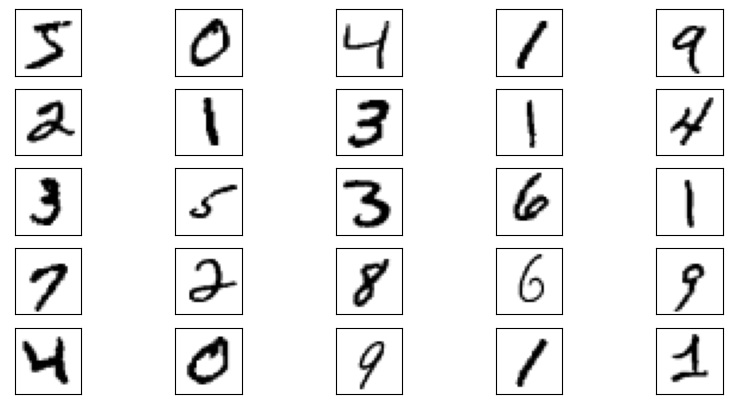

In [32]:
plt.figure(figsize=(10, 5))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    
plt.show()

In [33]:
model = keras.Sequential([
    
    #первый слой сверточной НС
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)), 
    #32 фильтра, замер ядер 3 * 3, #подача на вход изображения 28*28 пикселей. 1байт в градации серого.
    #после выполнения этой свертки мы получили размерность карты признаком 28 * 28 элементов
    MaxPooling2D((2, 2), strides=2),
    #после выполнения этой операции карта признаков уменьшилась в 2 раза, до 14 * 14
    
    
    #второй слой сверточной НС
    Conv2D(64, (3, 3), padding='same', activation='relu'), 
    #64 фильтра, замер ядер 3 * 3
    MaxPooling2D((2, 2), strides=2),
    #здесь мы уже получаем 7 * 7 и 64 канала
    
    Flatten(), #тензор 7 * 7 вытягивает в один прямой вектор
    Dense(128, activation='relu'), #внутренний слой из 128 нейронов и функцией акивации relu
    Dense(10, activation='softmax') #выходной слой из 10 нейронов и функцией активации softmax
])

print(model.summary())  #вывод структуры НС в консоль

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

**Первый слой (сверточный) содержить 320 коэффициентов**

32 фильтра * (3 * 3) размер ядра + 1 биас = 32 * (9+1) = 320

**Второй слой (сверточный)  18496**

На вход в второй слой подается 32 канальный тензор и он обрабатывается 64 фильтрами - каждый фильтр это ядро (3 * 3) + 1 (биас)

(3 * 3 * 32 + 1) * 64 = 18496 коэффициентов

**Третий (полносвязныц) слой 401536**

Подается тензор 7 * 7 и 64 канала и смещение + 1 (биас)

7 * 7 * 64 + 1 = 3137

3137 * 128 = 401536

**Четверный (полносвязный) слой 1290**

Подается 128 + 1 = 129 значений

Они связаны с 10 нейронами выходного слоя 

129 * 10 = 1290

In [34]:
model.compile(optimizer='adam',
            loss='categorical_crossentropy', #наилучший вариант для задач классификации
            metrics=['accuracy']) #нам важно получить большой % точности распознания (правильно распознает 99/100 цифр) - пример

Обучаем.

Обучение происходит дольше.

это уже глубокое обучение. Сверточная НС.

In [35]:
model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)
#x_train - картинки с цифрами
#y_train_cat - ответы к каждой картинрки (но уже в виде вектора - [1, 0, 0, 0, 0, 0, 0, 0, 0, 0])
#batch_size=32 - бач, после каждой 32 картинки будет происходит корректировка весов 
#epochs=5 - 5 эпох, 5 раз все картинки пройду по кругу для обучения 
#validation_split=0.2 соотношения разбиения выборки на тренировочную и валидационную(проверочную)

Epoch 1/5
1500/1500 [==============================] - 32s 21ms/step - loss: 0.1362 - accuracy: 0.9581 - val_loss: 0.0525 - val_accuracy: 0.9833
Epoch 2/5
1500/1500 [==============================] - 31s 20ms/step - loss: 0.0447 - accuracy: 0.9857 - val_loss: 0.0423 - val_accuracy: 0.9860
Epoch 3/5
1500/1500 [==============================] - 29s 19ms/step - loss: 0.0297 - accuracy: 0.9905 - val_loss: 0.0422 - val_accuracy: 0.9880
Epoch 4/5
1500/1500 [==============================] - 29s 19ms/step - loss: 0.0227 - accuracy: 0.9926 - val_loss: 0.0376 - val_accuracy: 0.9893
Epoch 5/5
1500/1500 [==============================] - 29s 19ms/step - loss: 0.0161 - accuracy: 0.9946 - val_loss: 0.0443 - val_accuracy: 0.9876


In [36]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 2s 5ms/step - loss: 0.0389 - accuracy: 0.9879


[0.038912009447813034, 0.9879000186920166]

**Получаем точность:  0.987**

Conv1D - аудио (одномерный сигнал)

Conv2D - изображение (двумерный сигнал)

Conv3D - видео (трехмерный сигнал)

Есть и другие виды свертки